## Dentate spikes detection and characterization

#### Dentate Spike Detection

Filters: 1-1000 Hz (Bragin et al., 1995)

In [2]:
from matplotlib import pyplot as plt
from neo.rawio import IntanRawIO as intanIO
from scipy import signal
import pandas as pd
import numpy as np
from scipy.integrate import simps
import os
from elephant import spectral as spec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.gridspec as gridspec

In [3]:
# low pass filter
fNQ = 25000 / 2               # Determine the Nyquist frequency.
n = 10                     # Define the filter order
Wn = 1000 / fNQ                  # ... and specify the cutoff frequency,
b = signal.butter(n, Wn, 'low')              # ... build lowpass filter.


In [4]:
def extract_lfp(channel, file):
    
    segment = exp_dir +'/'+ file
    reader = intanIO(filename = segment)
    reader.parse_header()
    size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [channel])
    raw_sig = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes= [channel], i_start = 0, i_stop = size) # read analog_in
    sig_scaled = reader.rescale_signal_raw_to_float(raw_sig, dtype='float64', channel_indexes= [channel])
    lfp_ds = signal.filtfilt(b[0], b[1], sig_scaled.flatten(), axis = 0) # Zero-phase filter each trial
    #down sample to 1/4 sampling frequency
    ds_factor = round(size/4)
    lfp_ds = signal.resample(lfp_ds, ds_factor)
    
    return lfp_ds


In [5]:
def long_lfp(channel, files):
    
    segments = []
    
    for file in files:
        channel = channel
        segment = extract_lfp(channel, file)
        segments.append(segment)
    
    rec = np.concatenate(segments)    
    return rec

In [898]:
exp_dir = '/Volumes/Seagate Expansion Drive/Intan_Exp/090821_KO_54_6_Fem_Pl/KO_Fem_Pl__210809_191604'

In [899]:
meta_data = exp_dir.split('/')[4]
meta_data

'090821_KO_54_6_Fem_Pl'

In [900]:
Date = meta_data.split('_')[0]
Genotype = meta_data.split('_')[1]
Sex = meta_data.split('_')[4]
Tx = meta_data.split('_')[5]


In [901]:
print(Date)
print(Genotype)
print(Sex)
print(Tx)

090821
KO
Fem
Pl


In [902]:
rec_files = [file for file in os.listdir(exp_dir) if 'rhd' in file]

In [903]:
len(rec_files)

34

In [904]:
# Select files
rec_td = rec_files[0:29]

In [905]:
channels = {'DG' : 14, 'DG_mol':3, 'CA3_p':28, 'CA3_r':16, 'CA1_p': 11, 'CA1_r':12}

In [906]:
dg_lfp = long_lfp(channels['DG'], rec_td)

In [907]:
dg_lfp.shape

(10875232,)

In [908]:
peaks, props = signal.find_peaks(dg_lfp, height = 1000, distance = 625, width = (1, 625))

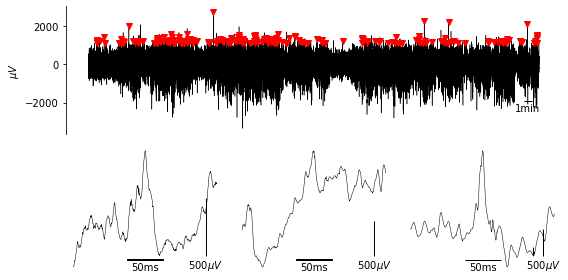

In [909]:
peaks_fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3)
ax = peaks_fig.add_subplot(gs[0,:])
ax.plot(dg_lfp, 'k', linewidth = 0.5)
ax.plot(peaks, dg_lfp[peaks]+100, 'vr')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_ylabel('$\mu V$')
bar = AnchoredSizeBar(ax.transData, 187500, '1min', 4, frameon = False, borderpad = 2, size_vertical = 10)
ax.add_artist(bar)


ax1 = peaks_fig.add_subplot(gs[1,0])
ax1.plot(np.linspace(-0.1, 0.1, 1250),dg_lfp[peaks[10]-625:peaks[10]+625], 'k', linewidth = 0.5)
ax1.axis('off')
ax1.spines['top'].set_visible(False)
bar_h = AnchoredSizeBar(ax1.transData, 0.05, '50ms', 'lower center', frameon = False, borderpad = 0, size_vertical = 5)
ax1.add_artist(bar_h)
bar_v = AnchoredSizeBar(ax1.transData, 0.0001, '$500\mu V$', 'lower right', frameon = False, borderpad = 0, size_vertical = 500)
ax1.add_artist(bar_v)

ax2 = peaks_fig.add_subplot(gs[1,1])
ax2.plot(np.linspace(-0.1, 0.1, 1250), dg_lfp[peaks[30]-625:peaks[30]+625], 'k', linewidth = 0.5)
ax2.axis('off')
ax2.spines['top'].set_visible(False)
bar_h = AnchoredSizeBar(ax2.transData, 0.05, '50ms', 'lower center', frameon = False, borderpad = 0, size_vertical = 5)
ax2.add_artist(bar_h)
bar_v = AnchoredSizeBar(ax2.transData, 0.0001, '$500\mu V$', 'lower right', frameon = False, borderpad = 0, size_vertical = 500)
ax2.add_artist(bar_v)

ax3 = peaks_fig.add_subplot(gs[1,2])
ax3.plot(np.linspace(-0.1, 0.1, 1250), dg_lfp[peaks[5]-625:peaks[5]+625], 'k', linewidth = 0.5)
ax3.axis('off')
ax3.spines['top'].set_visible(False)
bar_h = AnchoredSizeBar(ax3.transData, 0.05, '50ms', 'lower center', frameon = False, borderpad = 0, size_vertical = 5)
ax3.add_artist(bar_h)
bar_v = AnchoredSizeBar(ax3.transData, 0.0001, '$500\mu V$', 'lower right', frameon = False, borderpad = 0, size_vertical = 500)
ax3.add_artist(bar_v)

plt.tight_layout()

In [910]:
len(peaks)

215

In [911]:
pks_times = peaks/6250

intervals = []

for idx, ii in enumerate(pks_times):
    if ii == pks_times[-1]:
        break
    else:
        interval = pks_times[idx+1] - pks_times[idx]
        intervals.append(interval)
intervals = np.array(intervals)

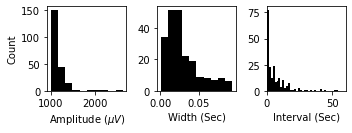

In [912]:
charcs_fig = plt.figure(figsize=(5, 2))
plt.subplot(131)
plt.hist(props['peak_heights'], color = 'k')
plt.xlabel(r'Amplitude ($\mu V$)')
plt.ylabel('Count')
plt.subplot(132)
plt.hist((props['widths']/6250), color = 'k')
plt.xlabel('Width (Sec)')
plt.subplot(133)
plt.hist(intervals, 60, color = 'k')
plt.xlabel('Interval (Sec)')
plt.xlim([0, 60])

plt.tight_layout()

In [913]:
amplitudes = np.round(props['peak_heights'], 2)
widths = np.round((props['widths']/6250) * 1000, 2)
intervals = np.round(intervals, 1)
intervals = np.append(intervals, np.nan)

In [914]:
peak_charcs = {'Amp': amplitudes, 'Width' : widths, 'Intervals':intervals}

In [915]:
peaks_df = pd.DataFrame(peak_charcs)

In [916]:
peaks_df

,Amp,Width,Intervals
0,1095.39,46.83,0.1
1,1032.48,27.01,0.8
2,1131.37,21.05,0.6
3,1163.61,42.96,8.8
4,1145.87,14.32,17.7
...,...,...,...
210,1109.52,10.33,6.4
211,1415.17,30.01,2.6
212,1044.79,70.83,0.2
213,1283.82,85.99,0.3


In [917]:
meta_data

'090821_KO_54_6_Fem_Pl'

In [918]:
peaks_fig.savefig(f'/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Dentate_Spikes/Figures/Traces/{meta_data}.svg')
charcs_fig.savefig(f'/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Dentate_Spikes/Figures/Charcs/{meta_data}.svg')
peaks_df.to_csv(f'/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Dentate_Spikes/Data/{meta_data}.csv')

## Remember to keep it clean
### The following cells are for the sample pool

In [919]:
amp_mean = np.round(peaks_df['Amp'].mean(), 2)
width_mean = np.round(peaks_df['Width'].mean(), 2)
int_mean = np.round(peaks_df['Intervals'].mean(), 2)

In [920]:
#Peaks_pool = {'Date':[], 'Genotype':[], 'Sex':[], 'Tx': [], 'Amp':[], 'Width':[], 'Int':[]}

In [921]:
# Metadata
Peaks_pool['Date'].append(Date)
Peaks_pool['Genotype'].append(Genotype)
Peaks_pool['Sex'].append(Sex)
Peaks_pool['Tx'].append(Tx)
# Charcs
Peaks_pool['Amp'].append(amp_mean)
Peaks_pool['Width'].append(width_mean)
Peaks_pool['Int'].append(int_mean)

In [922]:
Peaks_pool

{'Date': ['261021',
  '271021',
  '131021',
  '121021',
  '051021',
  '41021',
  '280921',
  '270921',
  '230921',
  '220921',
  '210921',
  '170921',
  '150921',
  '160921',
  '100921',
  '80921',
  '70921',
  '060921',
  '30921',
  '20921',
  '10921',
  '310821',
  '300821',
  '260821',
  '250821',
  '240821',
  '190821',
  '180821',
  '170821',
  '160821',
  '090821'],
 'Genotype': ['KO',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'KO',
  'KO',
  'WT',
  'WT',
  'WT',
  'WT',
  'WT',
  'KO',
  'KO',
  'KO',
  'KO',
  'KO',
  'KO',
  'KO',
  'KO',
  'KO'],
 'Sex': ['Male',
  'Fem',
  'Male',
  'Male',
  'Male',
  'Male',
  'Fem',
  'Fem',
  'Fem',
  'Fem',
  'Male',
  'Fem',
  'Fem',
  'Fem',
  'Male',
  'Fem',
  'Male',
  'Fem',
  'Male',
  'Male',
  'Fem',
  'Fem',
  'Fem',
  'Male',
  'Male',
  'Male',
  'Male',
  'Fem',
  'Fem',
  'Fem',
  'Fem'],
 'Tx': ['Tx05',
  'Tx1',
  'Tx05',
  'Tx05',
  'Tx1',
  'Pl',
 

In [927]:
DS_df = pd.DataFrame(Peaks_pool)

In [932]:
DS_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Dentate_Spikes/Data/Pool_DS.csv')